### 1. Import libraries

In [1]:
library(ggplot2)
library(bestNormalize)
library(reshape2)

Warning message:
"package 'bestNormalize' was built under R version 3.4.4"

### 2. Import dataset

In [43]:
wines <- read.csv("winequality-joined.csv", stringsAsFactors = FALSE)
whites <- wines[wines$type == "white",1:11]
head(whites)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8
6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1


### 3. Normalize each column

In [44]:
### Apply best normalize to each column
normal.list.whites <-lapply(whites, function(x) bestNormalize(x)) 

Warning message in orderNorm(x = c(7, 6.3, 8.1, 7.2, 7.2, 8.1, 6.2, 7, 6.3, 8.1, :
"Ties in data, Normal distribution not guaranteed
"Warning message in orderNorm(x = c(0.27, 0.3, 0.28, 0.23, 0.23, 0.28, 0.32, 0.27, :
"Ties in data, Normal distribution not guaranteed
"Warning message in bestNormalize(x):
"boxcox  did not work;  Error in estimate_boxcox_lambda(x, ...) : x must be positive
"Warning message in orderNorm(x = c(0.36, 0.34, 0.4, 0.32, 0.32, 0.4, 0.16, 0.36, :
"Ties in data, Normal distribution not guaranteed
"Warning message in orderNorm(x = c(20.7, 1.6, 6.9, 8.5, 8.5, 6.9, 7, 20.7, 1.6, :
"Ties in data, Normal distribution not guaranteed
"Warning message in orderNorm(x = c(0.045, 0.049, 0.05, 0.058, 0.058, 0.05, 0.045, :
"Ties in data, Normal distribution not guaranteed
"Warning message in orderNorm(x = c(45, 14, 30, 47, 47, 30, 30, 45, 14, 28, 11, 17, :
"Ties in data, Normal distribution not guaranteed
"Warning message in orderNorm(x = c(170, 132, 97, 186, 186, 97, 136, 17

In [45]:
#convert list to a dataframe for whites
normal.whites<-normal.list.whites[[1]][[1]]
for (i in 2:11) {
    normal.whites <- cbind(normal.whites ,normal.list.whites[[i]][[1]])
    }
colnames(normal.whites) <- colnames(wines[1:11])

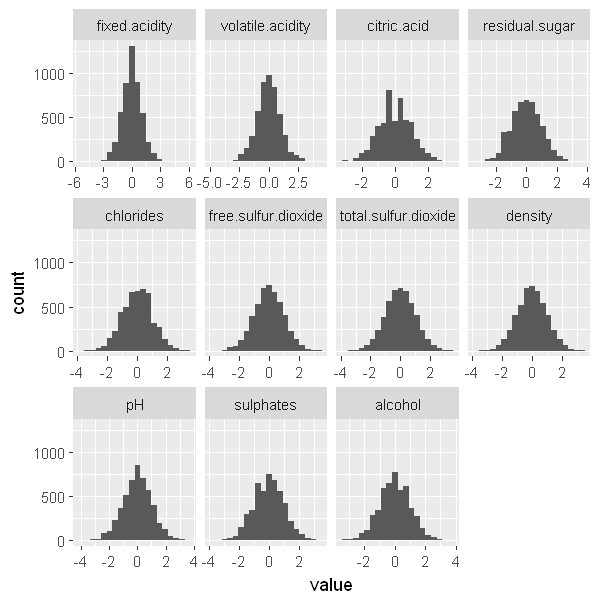

In [46]:
options(repr.plot.width=5, repr.plot.height=5) #Graph sizing in jupyter,for rstudio is not required

ggplot(data = melt(normal.whites), mapping = aes(x = value)) + 
    geom_histogram(bins = 20) + facet_wrap(~Var2, scales = 'free_x')

### 4. Run PCA analysis Whites

In [47]:
source("PCA_functions.R")
my.pca.results<-my.pca(normal.whites)
my.pca.results$summary
my.pca.results$loadings

All 4898 observations are valid.


,Eigenvalues,% explained,% explained cum.
PC1,3.3738,30.6710,30.6710
PC2,1.6094,14.6308,45.3018
PC3,1.2422,11.2925,56.5943
PC4,1.0428,9.4796,66.0739
PC5,0.9714,8.8308,74.9047
PC6,0.7816,7.1054,82.0101
PC7,0.6908,6.2796,88.2897
PC8,0.5521,5.0191,93.3088
PC9,0.4108,3.7349,97.0437
PC10,0.2815,2.5590,99.6027


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
fixed.acidity,0.29354504,0.75971507,-0.06766687,0.03701085,-0.217819460,-0.03728159,0.109801984,0.50338128,-0.08385318,0.087624485,-0.0414955456
volatile.acidity,0.02048423,-0.12296846,0.66297311,0.27084220,-0.593731142,-0.19565854,-0.239239231,-0.04216277,0.08972113,0.117074058,0.0014327609
citric.acid,0.20097285,0.48864234,-0.57347751,0.14173859,-0.111274505,-0.07343847,-0.542559081,-0.23895621,0.05109027,0.004029638,-0.0004338972
residual.sugar,0.71504261,-0.03470278,0.24040077,0.17052835,0.034406672,0.52771653,-0.111840653,-0.13142638,-0.28922509,-0.022403713,-0.0838717923
chlorides,0.59829802,-0.07627931,0.04669522,-0.48427771,-0.021073697,-0.51016617,-0.021643144,-0.11751191,-0.35178807,0.027254222,-0.0051841025
free.sulfur.dioxide,0.53940890,-0.31274677,-0.28134947,0.56888721,0.210775349,-0.18084137,0.188205734,-0.02221235,-0.02698854,0.307584794,0.0074757780
total.sulfur.dioxide,0.73969760,-0.27502368,-0.11425334,0.35634784,-0.097751385,-0.22435141,0.040904543,0.14824423,0.06232445,-0.386931297,-0.0057653229
density,0.91455240,0.02498947,0.10302426,-0.18470900,0.012381496,0.25718486,-0.098907581,0.10967443,0.05566256,0.043423861,0.1585733909
pH,-0.20069178,-0.72750839,-0.24410745,-0.17655624,-0.009437984,0.07146697,-0.412923580,0.39475351,-0.04080582,0.074428453,-0.0309236167
sulphates,0.14159880,-0.26050001,-0.48573767,-0.20503654,-0.690675654,0.20541125,0.310919366,-0.12842943,0.02013948,0.035419973,-0.0075280399


In [31]:
source("PCA_functions.R")
acid.pca.white<-my.pca(normal.whites[,c("fixed.acidity","citric.acid","pH")])
acid.pca.white$summary
acid.pca.white$loadings

All 4898 observations are valid.


,Eigenvalues,% explained,% explained cum.
PC1,1.6225,54.0819,54.0819
PC2,0.8518,28.3928,82.4747
PC3,0.5258,17.5254,100.0001


,PC1,PC2,PC3
fixed.acidity,-0.8343785,-0.09768861,0.5424661
citric.acid,-0.6131794,0.75830068,-0.2213392
pH,0.7418082,0.51693300,0.4272013


In [23]:
source("PCA_functions.R")
acid.pca.white<-my.pca(normal.whites[,c("free.sulfur.dioxide","total.sulfur.dioxide")])
acid.pca.white$summary
acid.pca.white$loadings

All 4898 observations are valid.


,Eigenvalues,% explained,% explained cum.
PC1,1.6221,81.1048,81.1048
PC2,0.3779,18.8952,100.0000


,PC1,PC2
free.sulfur.dioxide,0.900582,-0.4346861
total.sulfur.dioxide,0.900582,0.4346861
